In [2]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

print("Ключі iris_dataset: \n{}".format(iris_dataset.keys()))

print(iris_dataset["DESCR"][:193] + "\n...")

print("Назви відповідей: {}".format(iris_dataset["target_names"]))
print("Назва ознак: \n{}".format(iris_dataset["feature_names"]))
print("Тип масиву data: {}".format(type(iris_dataset["data"])))
print("Форма масиву data: {}".format(iris_dataset["data"].shape))
print("Ознаки перших п'яти елементів:\n{}".format(iris_dataset["data"][:5]))
print("Тип масиву target: {}".format(type(iris_dataset["target"])))
print("Відповіді:\n{}".format(iris_dataset["target"]))

Ключі iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
Назви відповідей: ['setosa' 'versicolor' 'virginica']
Назва ознак: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Тип масиву data: <class 'numpy.ndarray'>
Форма масиву data: (150, 4)
Ознаки перших п'яти елементів:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Тип масиву target: <class 'numpy.ndarray'>
Відповіді:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [3]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
dataset = read_csv(url, names=names)

In [5]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())
print(dataset.groupby("class").size())

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

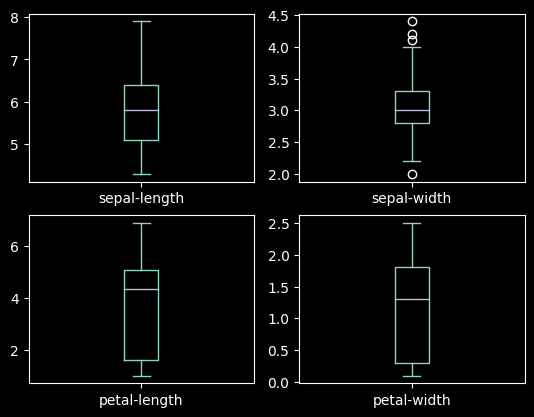

In [6]:
# Діаграма розмаху
dataset.plot(kind="box", subplots=True, layout=(2, 2), sharex=False, sharey=False)
pyplot.show()

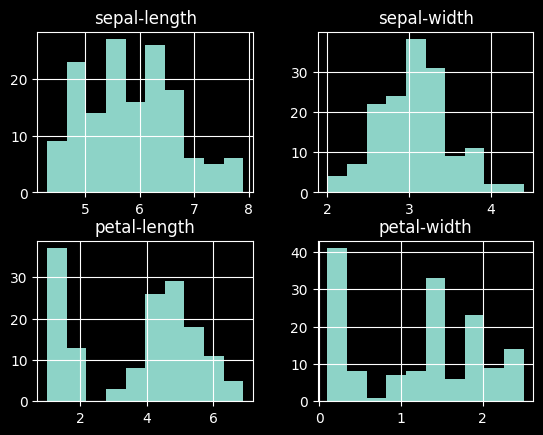

In [7]:
# Гістограма розподілу атрибутів датасета
dataset.hist()
pyplot.show()

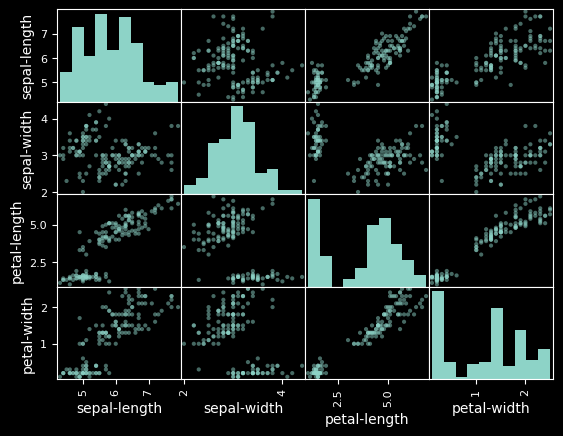

In [8]:
# Матриця діаграм розсіювання
scatter_matrix(dataset)
pyplot.show()

In [9]:
# Розділення датасету на навчальну та контрольну вибірки
array = dataset.values
# Вибір перших 4-х стовпців
X = array[:, 0:4]
# Вибір 5-го стовпця
y = array[:, 4]
# Разделение X и y на обучающую и контрольную выборки
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, y, test_size=0.20, random_state=1
)

In [10]:
# Завантажуємо алгоритми моделі
models = []
models.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))
# оцінюємо модель на кожній ітерації
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)


CART: 0.933333 (0.050000)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


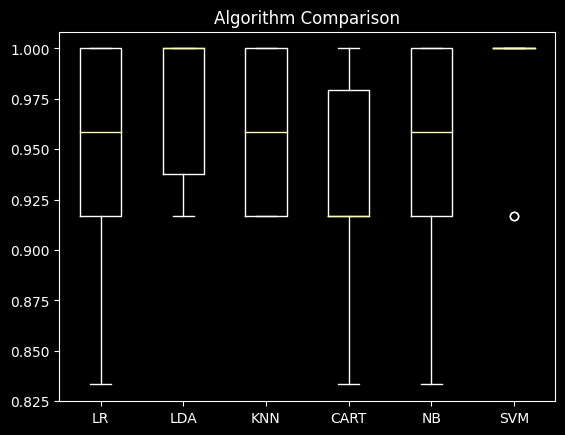

In [11]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [12]:
# Створюємо прогноз на контрольній вибірці
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Оцінюємо прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
import numpy as np

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
X_new = np.array([[5, 2.9, 1, 0.2]])
print("форма массива X_new: {}".format(X_new.shape))
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Оцінка тестового набору: {:.2f}".format(knn.score(X_validation, Y_validation)))

форма массива X_new: (1, 4)
Прогноз: ['Iris-setosa']
Оцінка тестового набору: 1.00
